# Tech Challenge #01

## O Problema

Imagine agora, que você vai atuar como Expert em Data Analytics em uma empresa que exporta vinhos no Brasil para o mundo todo.

Sua área é recém-criada dentro da empresa, e você será responsável pelos relatórios iniciais a serem apresentados em uma reunião de investidores e acionistas, explicando a quantidade de vinhos exportados e os fatores que podem vir a surgir e que interferem nas análises:

* Dados climáticos.
* Dados demográficos
* Dados econômicos.
* Dados de avaliações de vinhos.
    * O Head de Dados pediu para que você construísse uma tabela contendo as seguintes informações:
        * País de origem (Brasil)
        * País de destino
        * Quantidade em litros de vinho exportado (1Kg = 1L)
        * Valor em US$      


## Seu objetivo  é dizer o montante de venda de exportaçãol nos últimos 15 anos, separando a análise por país e trazendo quais as prospecções futuras e possivels ações para uma melhoria nas exportações. Construa gráficos atraentes e que passem a ideia central para que os acionistas e investidores possam seguir em frente com suas ações.

# DICA: Para construir uma boa análise, utilize várias bases do mesmo site! Outro ponto interessante, é utilizar os dados citados acima para enriquecer ainda mais a mensagem que você quer passar

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [3]:
production = pd.read_csv('embrapa/producao.csv')
production.head()

,Produto,Quantidade (L.)
0,VINHO DE MESA,195.031.611
1,Tinto,162.844.214
2,Branco,30.198.430
3,Rosado,1.988.968
4,VINHO FINO DE MESA (VINÍFERA),47.511.796


In [4]:
exportation = pd.read_csv('embrapa/vinho_exportacao.csv')
exportation.head()

,Países,Quantidade_(Kg),Valor_(US$)
0,Alemanha-República_Democrática,7.630,45.367
1,Angola,4.068,4.761
2,Antígua_e_Barbuda,419,1.866
3,Argentina,480,3.232
4,Austrália,1.424,12.299


In [5]:
area_colhida = pd.read_csv('ibge/areaColhida.csv', sep=';') # hectares

quantidade_produzida = pd.read_csv('ibge/quantidadeProduzida.csv', sep=';') # Toneladas
rendimento_da_producao = pd.read_csv('ibge/rendimentoMedioPorProducao.csv', sep=';') # Quilogramas / hectare

In [6]:
area_destinada = pd.read_csv('ibge/areaDestinadaAColheita.csv', sep=';') # hectares

In [7]:
area_colhida.set_index('Unidade_Federativa', inplace=True)

In [8]:
display(area_colhida)

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Unidade_Federativa,,,,,,,,,,,,,,,,,
Rondônia,25,29,34,33,20,25,27,27,25,27,27,25,30,30,26,17,11
Tocantins,4,4,4,4,0,0,0,0,0,0,0,1,1,1,1,1,1
Maranhão,0,0,0,0,1,8,0,0,0,0,0,0,0,0,0,0,0
Piauí,2,0,6,10,12,11,10,10,9,7,10,10,8,1,5,4,2
Ceará,67,91,87,86,219,75,44,45,25,38,36,36,21,23,26,19,23
Rio Grande do Norte,0,0,0,0,0,0,0,0,0,0,2,2,3,3,2,2,8
Paraíba,110,110,110,110,90,112,102,102,202,122,132,132,132,132,130,130,110
Pernambuco,5111,5673,5864,6003,6964,6822,6763,6787,6797,6814,6974,8237,8745,8806,8298,8838,7967
Bahia,3938,4096,4217,3724,3273,2718,2484,2357,2862,2861,2858,1960,1962,1926,2043,2486,2564


In [9]:
quantidade_produzida.set_index('Unidade_Federativa', inplace=True)
display(quantidade_produzida)

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Unidade_Federativa,,,,,,,,,,,,,,,,,
Rondônia,242,224,260,229,143,176,202,198,185,197,201,187,218,218,197,124,76
Tocantins,72,72,72,72,0,0,0,0,0,0,0,1,12,12,12,10,3
Piauí,52,0,120,180,288,146,324,320,252,168,240,240,51,24,120,96,24
Ceará,2172,2381,2624,2908,6650,1770,767,664,573,940,760,708,422,564,763,521,583
Rio Grande do Norte,0,0,0,0,0,0,0,0,0,0,30,30,42,42,30,30,84
Paraíba,1980,1980,1980,1980,1620,2016,1836,1836,4036,2196,2636,2620,2630,2624,2600,2600,2200
Pernambuco,155781,170325,165075,158517,195168,208660,224758,228727,236719,237367,368441,449383,426392,456080,349757,420501,338206
Bahia,117111,119610,97481,90508,78283,65176,62292,52778,77504,77408,77322,56504,60524,71939,55872,70788,75664
Minas Gerais,12318,11995,13711,11773,10113,9873,10831,12725,11557,12615,11224,13685,15800,17424,18780,19908,18656


In [10]:
rendimento_da_producao.set_index('Unidade_Federativa', inplace=True)
display(rendimento_da_producao)

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Unidade_Federativa,,,,,,,,,,,,,,,,,
Rondônia,9680,7724,7647,6939,7150,7040,7481,7333,7400,7296,7444,7480,7267,7267,7577,7294,6909
Tocantins,18000,18000,18000,18000,0,0,0,0,0,0,0,1000,12000,12000,12000,10000,3000
Piauí,26000,0,20000,18000,24000,13273,32400,32000,28000,24000,24000,24000,6375,24000,24000,24000,12000
Ceará,32417,26164,30160,33813,30365,23600,17432,14756,22920,24737,21111,19667,20095,24522,29346,27421,25348
Paraíba,18000,18000,18000,18000,18000,18000,18000,18000,19980,18000,19970,19848,19924,19879,20000,20000,20000
Pernambuco,30479,30023,28150,26406,28025,30586,33233,33701,34827,34835,52831,54557,48758,51792,42150,47579,42451
Bahia,29738,29201,23116,24303,23917,23979,25077,22392,27080,27056,27055,28829,30848,37352,27348,28475,29510
Minas Gerais,13809,14279,15777,14498,13394,13112,14121,15368,14741,14737,13523,15394,14522,14364,15356,15326,14736
Espírito Santo,15352,20080,21220,22000,22722,15101,15739,15617,16130,15723,16292,17694,16131,14505,15175,16030,16106


In [11]:
area_colhida_filtrada = area_colhida.drop(['Rondônia', 'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Espírito Santo', 'Espírito Santo', 'Rio de Janeiro', 'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal', 'Minas Gerais'],axis=0)
area_colhida_filtrada

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Unidade_Federativa,,,,,,,,,,,,,,,,,
Pernambuco,5111,5673,5864,6003,6964,6822,6763,6787,6797,6814,6974,8237,8745,8806,8298,8838,7967
Bahia,3938,4096,4217,3724,3273,2718,2484,2357,2862,2861,2858,1960,1962,1926,2043,2486,2564
São Paulo,10414,11112,10565,11216,10001,10657,10716,8812,8040,7803,7694,7348,7238,8023,8018,8617,8461
Paraná,5657,5700,5800,5800,5969,6064,5823,5276,4681,4459,4301,3886,3946,3618,3646,3579,3507
Santa Catarina,4510,4915,4836,4934,5082,4985,4997,4963,4897,4843,4684,4426,4015,3951,3939,3911,3873
Rio Grande do Sul,44298,45336,47177,48259,48747,49197,49900,49783,49995,49733,49172,48373,46857,46454,45945,46295,46531


In [12]:
area_colhida_filtrada2 = area_colhida_filtrada.drop(['Pernambuco', 'Bahia', 'São Paulo', 'Paraná', 'Santa Catarina'])
area_colhida_filtrada2

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Unidade_Federativa,,,,,,,,,,,,,,,,,
Rio Grande do Sul,44298,45336,47177,48259,48747,49197,49900,49783,49995,49733,49172,48373,46857,46454,45945,46295,46531


In [13]:
area_colhida_filtrada.drop('Rio Grande do Sul', inplace=True)
area_colhida_filtrada

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Unidade_Federativa,,,,,,,,,,,,,,,,,
Pernambuco,5111,5673,5864,6003,6964,6822,6763,6787,6797,6814,6974,8237,8745,8806,8298,8838,7967
Bahia,3938,4096,4217,3724,3273,2718,2484,2357,2862,2861,2858,1960,1962,1926,2043,2486,2564
São Paulo,10414,11112,10565,11216,10001,10657,10716,8812,8040,7803,7694,7348,7238,8023,8018,8617,8461
Paraná,5657,5700,5800,5800,5969,6064,5823,5276,4681,4459,4301,3886,3946,3618,3646,3579,3507
Santa Catarina,4510,4915,4836,4934,5082,4985,4997,4963,4897,4843,4684,4426,4015,3951,3939,3911,3873


In [14]:
area_colhida_filtrada

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Unidade_Federativa,,,,,,,,,,,,,,,,,
Pernambuco,5111,5673,5864,6003,6964,6822,6763,6787,6797,6814,6974,8237,8745,8806,8298,8838,7967
Bahia,3938,4096,4217,3724,3273,2718,2484,2357,2862,2861,2858,1960,1962,1926,2043,2486,2564
São Paulo,10414,11112,10565,11216,10001,10657,10716,8812,8040,7803,7694,7348,7238,8023,8018,8617,8461
Paraná,5657,5700,5800,5800,5969,6064,5823,5276,4681,4459,4301,3886,3946,3618,3646,3579,3507
Santa Catarina,4510,4915,4836,4934,5082,4985,4997,4963,4897,4843,4684,4426,4015,3951,3939,3911,3873


In [15]:
area_colhida_filtrada2

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Unidade_Federativa,,,,,,,,,,,,,,,,,
Rio Grande do Sul,44298,45336,47177,48259,48747,49197,49900,49783,49995,49733,49172,48373,46857,46454,45945,46295,46531


In [16]:
x_values = area_colhida_filtrada2.columns
x_values

Index(['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

In [17]:
area_colhida_filtrada2.dtypes

2006    int64
2007    int64
2008    int64
2009    int64
2010    int64
2011    int64
2012    int64
2013    int64
2014    int64
2015    int64
2016    int64
2017    int64
2018    int64
2019    int64
2020    int64
2021    int64
2022    int64
dtype: object

In [18]:
area_colhida_filtrada3 = area_colhida_filtrada2.T
area_colhida_filtrada3

Unidade_Federativa,Rio Grande do Sul
2006,44298
2007,45336
2008,47177
2009,48259
2010,48747
2011,49197
2012,49900
2013,49783
2014,49995
2015,49733


In [19]:
area_colhida_filtrada3.columns = ['hectare']

In [20]:
area_colhida_filtrada3.rename({'Unidade_Federativa': 'Anos'})

,hectare
2006,44298
2007,45336
2008,47177
2009,48259
2010,48747
2011,49197
2012,49900
2013,49783
2014,49995
2015,49733


In [21]:
area_colhida_filtrada3.index.names = ['Anos']

In [22]:
area_colhida_filtrada3

,hectare
Anos,
2006,44298
2007,45336
2008,47177
2009,48259
2010,48747
2011,49197
2012,49900
2013,49783
2014,49995


In [23]:
area_colhida_filtrada3['hectare']

Anos
2006    44298
2007    45336
2008    47177
2009    48259
2010    48747
2011    49197
2012    49900
2013    49783
2014    49995
2015    49733
2016    49172
2017    48373
2018    46857
2019    46454
2020    45945
2021    46295
2022    46531
Name: hectare, dtype: int64

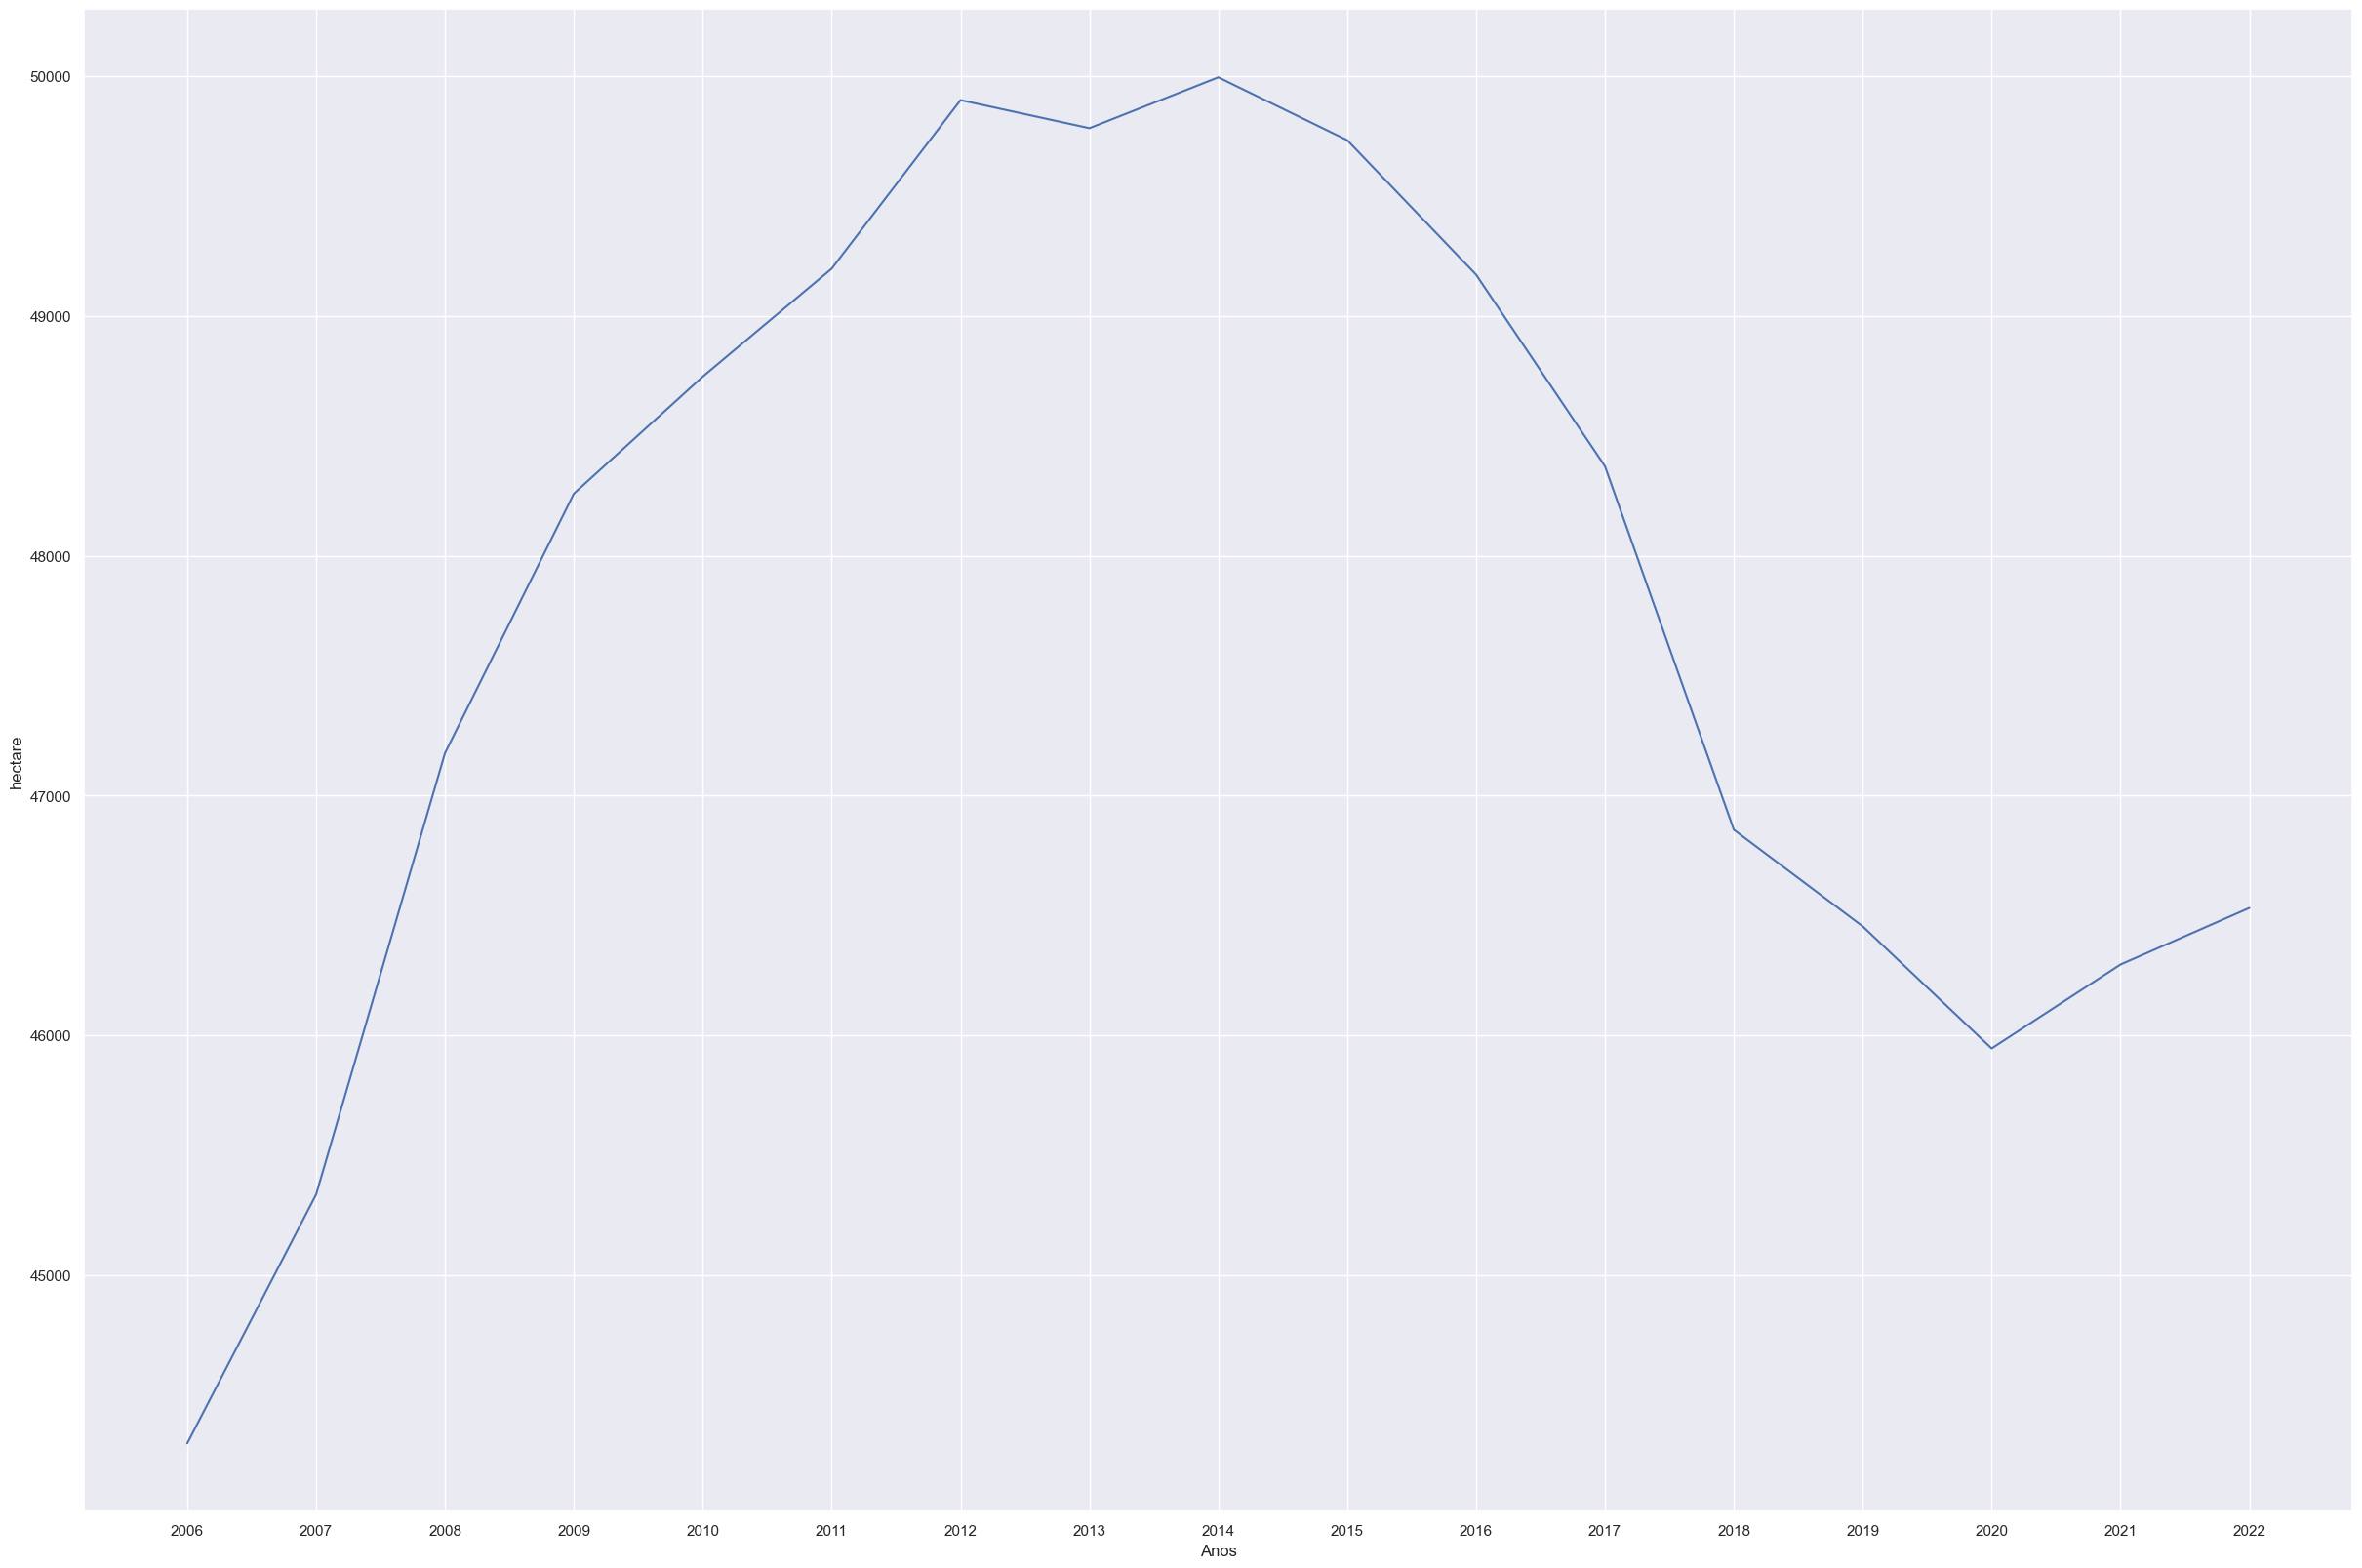

In [24]:
fig, ax = plt.subplots(figsize=(30,20))
ax = sns.lineplot(area_colhida_filtrada3, x=area_colhida_filtrada3.index, y=area_colhida_filtrada3['hectare'])


plt.show()

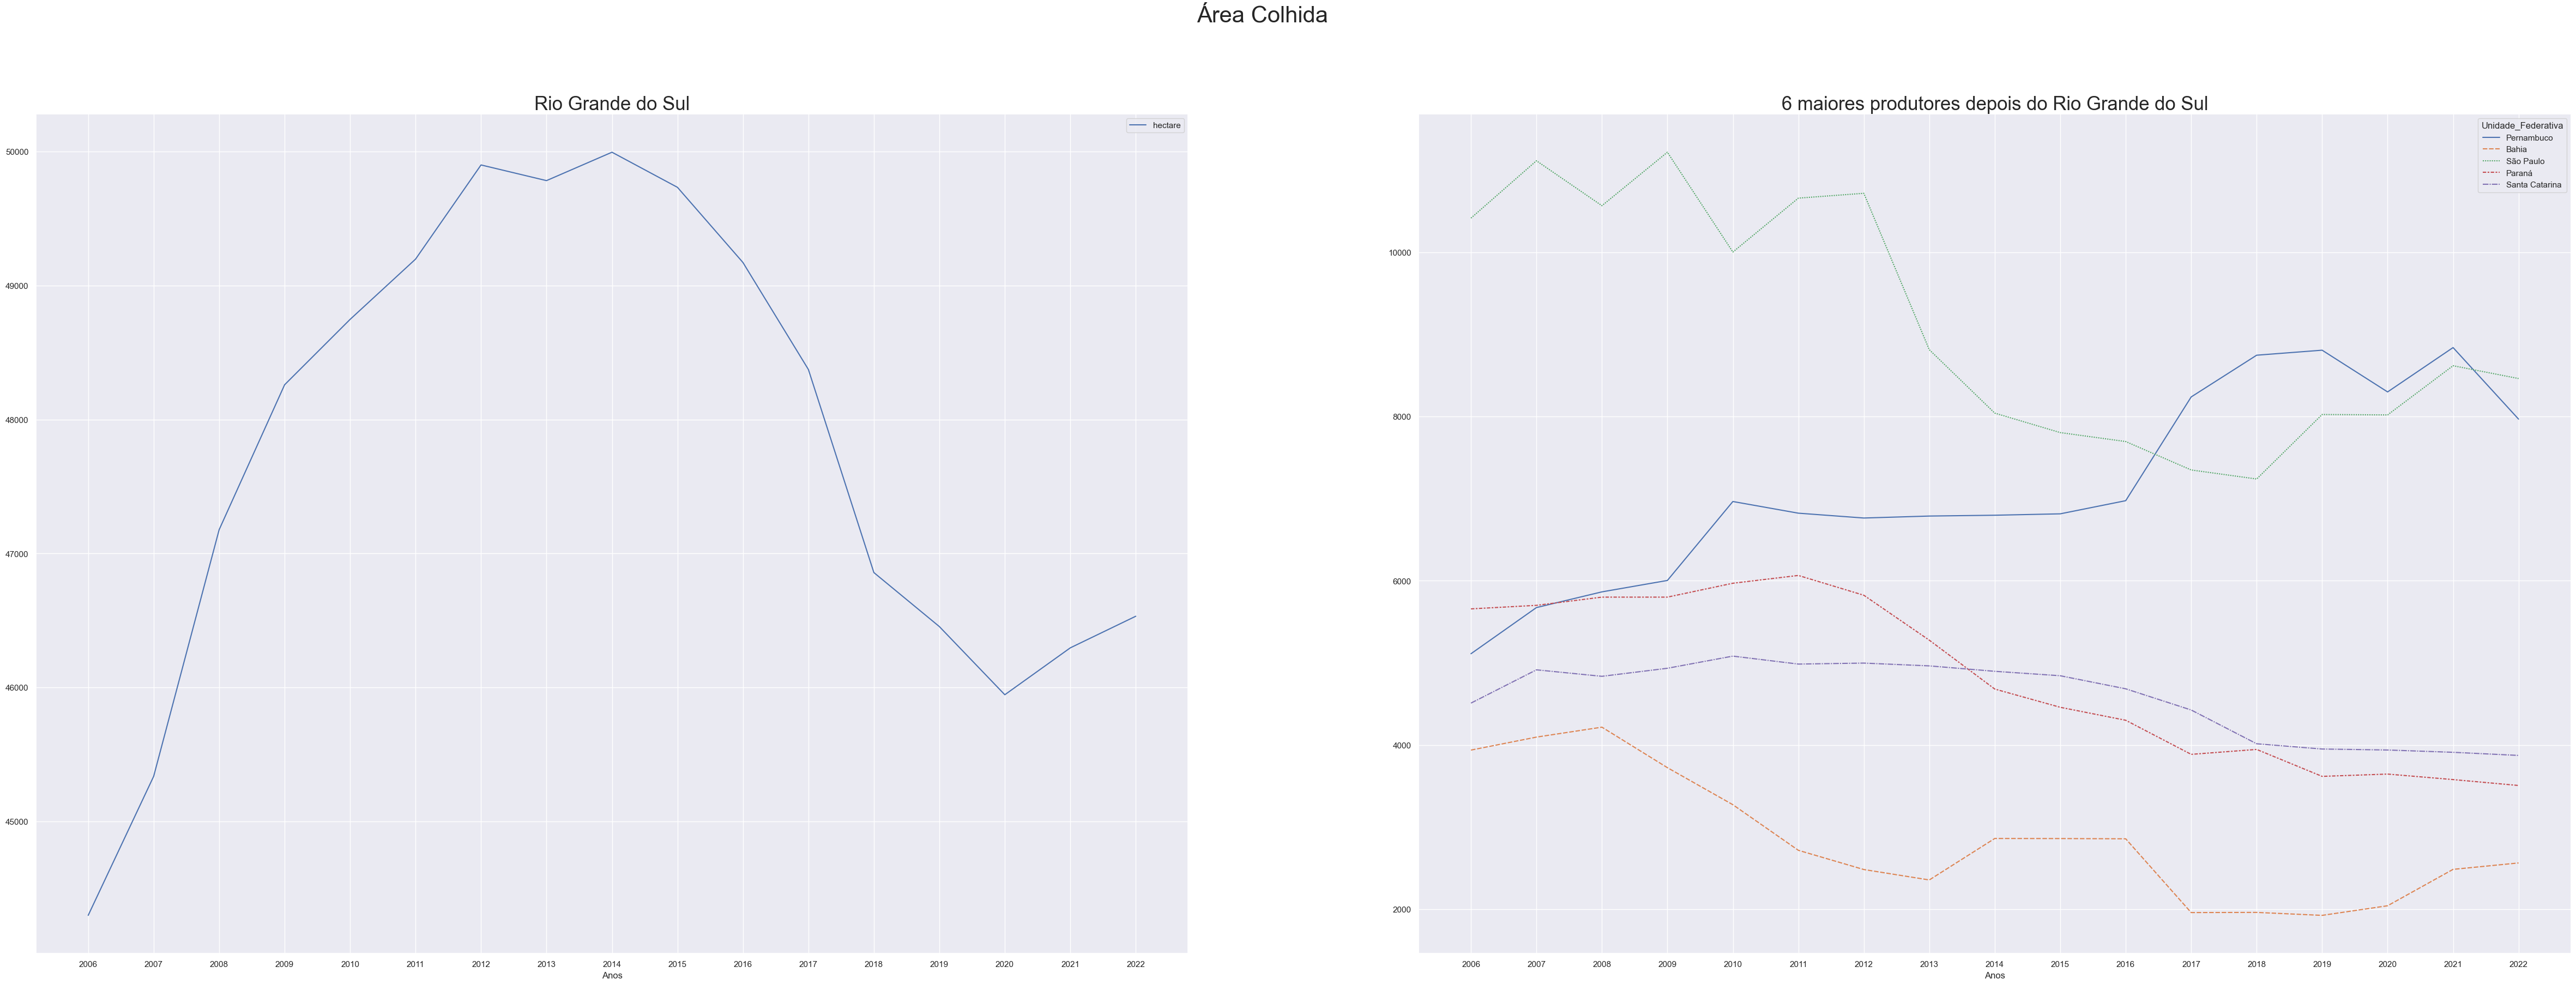

In [25]:
fig, axs = plt.subplots(1,2, figsize=(60,20))
sns.lineplot(ax=axs[0] ,data=area_colhida_filtrada3)
fig.suptitle('Área Colhida', fontsize=30)
axs[0].set_title('Rio Grande do Sul', fontsize=25)
sns.lineplot(ax=axs[1], data=area_colhida_filtrada.T)
axs[1].set_title('6 maiores produtores depois do Rio Grande do Sul', fontsize=25)
# axs[1,0] = sb.lineplot(quantidade_produzida)
# axs[1,1] = sb.lineplot(rendimento_da_producao)

plt.show()

In [26]:
area_destinada.columns = [
    'Anos', 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022
]
area_destinada

,Anos,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Rondônia,25,29,34,33,20,25,27,27,25,27,27,25,30,30,26,17,11
1,Tocantins,4,4,4,4,0,0,0,0,0,0,0,1,1,1,1,1,1
2,Piauí,2,0,6,10,12,11,10,10,9,7,10,10,8,1,5,4,2
3,Ceará,67,91,93,92,219,75,44,45,25,38,36,36,21,23,26,19,23
4,Rio Grande do Norte,0,0,0,0,0,0,0,0,0,0,2,2,3,3,2,2,8
5,Paraíba,110,110,110,110,90,112,102,102,202,122,132,132,132,132,130,130,110
6,Pernambuco,5111,5673,6973,6003,6964,6822,6763,6787,6797,6814,6974,8437,8745,8806,8763,8838,9237
7,Bahia,3938,4096,4376,3724,3273,2718,2484,2357,2862,2861,2858,1961,1962,1926,2043,2486,2564
8,Minas Gerais,893,840,874,812,755,753,767,828,784,856,830,895,1088,1213,1223,1299,1266
9,Espírito Santo,34,50,50,53,72,89,115,128,138,148,154,196,198,188,212,198,201


In [27]:
area_destinada.set_index('Anos', inplace=True)
display(area_destinada)

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Anos,,,,,,,,,,,,,,,,,
Rondônia,25,29,34,33,20,25,27,27,25,27,27,25,30,30,26,17,11
Tocantins,4,4,4,4,0,0,0,0,0,0,0,1,1,1,1,1,1
Piauí,2,0,6,10,12,11,10,10,9,7,10,10,8,1,5,4,2
Ceará,67,91,93,92,219,75,44,45,25,38,36,36,21,23,26,19,23
Rio Grande do Norte,0,0,0,0,0,0,0,0,0,0,2,2,3,3,2,2,8
Paraíba,110,110,110,110,90,112,102,102,202,122,132,132,132,132,130,130,110
Pernambuco,5111,5673,6973,6003,6964,6822,6763,6787,6797,6814,6974,8437,8745,8806,8763,8838,9237
Bahia,3938,4096,4376,3724,3273,2718,2484,2357,2862,2861,2858,1961,1962,1926,2043,2486,2564
Minas Gerais,893,840,874,812,755,753,767,828,784,856,830,895,1088,1213,1223,1299,1266


In [28]:
area_destinada.head()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Anos,,,,,,,,,,,,,,,,,
Rondônia,25,29,34,33,20,25,27,27,25,27,27,25,30,30,26,17,11
Tocantins,4,4,4,4,0,0,0,0,0,0,0,1,1,1,1,1,1
Piauí,2,0,6,10,12,11,10,10,9,7,10,10,8,1,5,4,2
Ceará,67,91,93,92,219,75,44,45,25,38,36,36,21,23,26,19,23
Rio Grande do Norte,0,0,0,0,0,0,0,0,0,0,2,2,3,3,2,2,8


In [29]:
area_destinada.drop([ 
    'Rondônia', 
    'Tocantins', 
    'Piauí', 
    'Ceará',
    'Rio Grande do Norte',
    'Paraíba',
    'Minas Gerais',
    'Espírito Santo',
    'Rio de Janeiro',
    'Mato Grosso do Sul',
    'Mato Grosso',
    'Goiás',
    'Distrito Federal'
    
], inplace=True)
area_destinada

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Anos,,,,,,,,,,,,,,,,,
Pernambuco,5111,5673,6973,6003,6964,6822,6763,6787,6797,6814,6974,8437,8745,8806,8763,8838,9237
Bahia,3938,4096,4376,3724,3273,2718,2484,2357,2862,2861,2858,1961,1962,1926,2043,2486,2564
São Paulo,10414,11112,10565,11259,10004,10657,11269,8812,8040,7803,7699,7348,7238,8023,8019,8639,8462
Paraná,5657,5700,5800,5800,5969,6064,5824,5276,4681,4465,4324,3888,3946,3638,3646,3583,3513
Santa Catarina,4512,4915,4836,5168,5082,4985,4997,4965,4897,4846,4737,4426,4016,3955,3942,3937,3895
Rio Grande do Sul,44298,45379,47206,48259,48753,49198,50180,50056,50007,49739,49226,48397,46858,46671,46174,46350,46533


In [30]:
area_destinada_RS = area_destinada.drop([
    'Pernambuco', 
    'Bahia', 
    'São Paulo', 
    'Paraná', 
    'Santa Catarina'
])
area_destinada_RS

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Anos,,,,,,,,,,,,,,,,,
Rio Grande do Sul,44298,45379,47206,48259,48753,49198,50180,50056,50007,49739,49226,48397,46858,46671,46174,46350,46533


In [31]:
area_destinada.drop('Rio Grande do Sul', inplace=True)
area_destinada

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Anos,,,,,,,,,,,,,,,,,
Pernambuco,5111,5673,6973,6003,6964,6822,6763,6787,6797,6814,6974,8437,8745,8806,8763,8838,9237
Bahia,3938,4096,4376,3724,3273,2718,2484,2357,2862,2861,2858,1961,1962,1926,2043,2486,2564
São Paulo,10414,11112,10565,11259,10004,10657,11269,8812,8040,7803,7699,7348,7238,8023,8019,8639,8462
Paraná,5657,5700,5800,5800,5969,6064,5824,5276,4681,4465,4324,3888,3946,3638,3646,3583,3513
Santa Catarina,4512,4915,4836,5168,5082,4985,4997,4965,4897,4846,4737,4426,4016,3955,3942,3937,3895


In [32]:
area_destinada = area_destinada.T
area_destinada

Anos,Pernambuco,Bahia,São Paulo,Paraná,Santa Catarina
2006,5111,3938,10414,5657,4512
2007,5673,4096,11112,5700,4915
2008,6973,4376,10565,5800,4836
2009,6003,3724,11259,5800,5168
2010,6964,3273,10004,5969,5082
2011,6822,2718,10657,6064,4985
2012,6763,2484,11269,5824,4997
2013,6787,2357,8812,5276,4965
2014,6797,2862,8040,4681,4897
2015,6814,2861,7803,4465,4846


<Axes: >

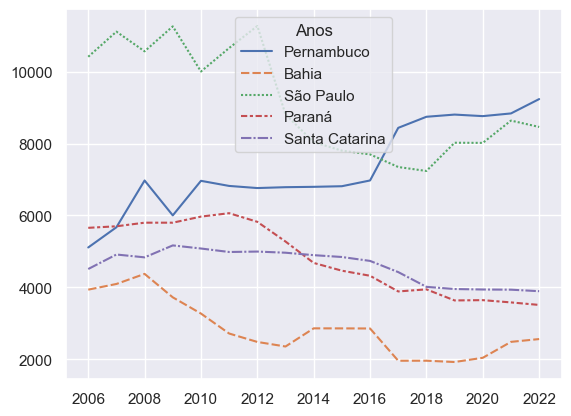

In [33]:
sns.lineplot(area_destinada)

In [34]:
area_destinada_RS = area_destinada_RS.T
area_destinada_RS

Anos,Rio Grande do Sul
2006,44298
2007,45379
2008,47206
2009,48259
2010,48753
2011,49198
2012,50180
2013,50056
2014,50007
2015,49739


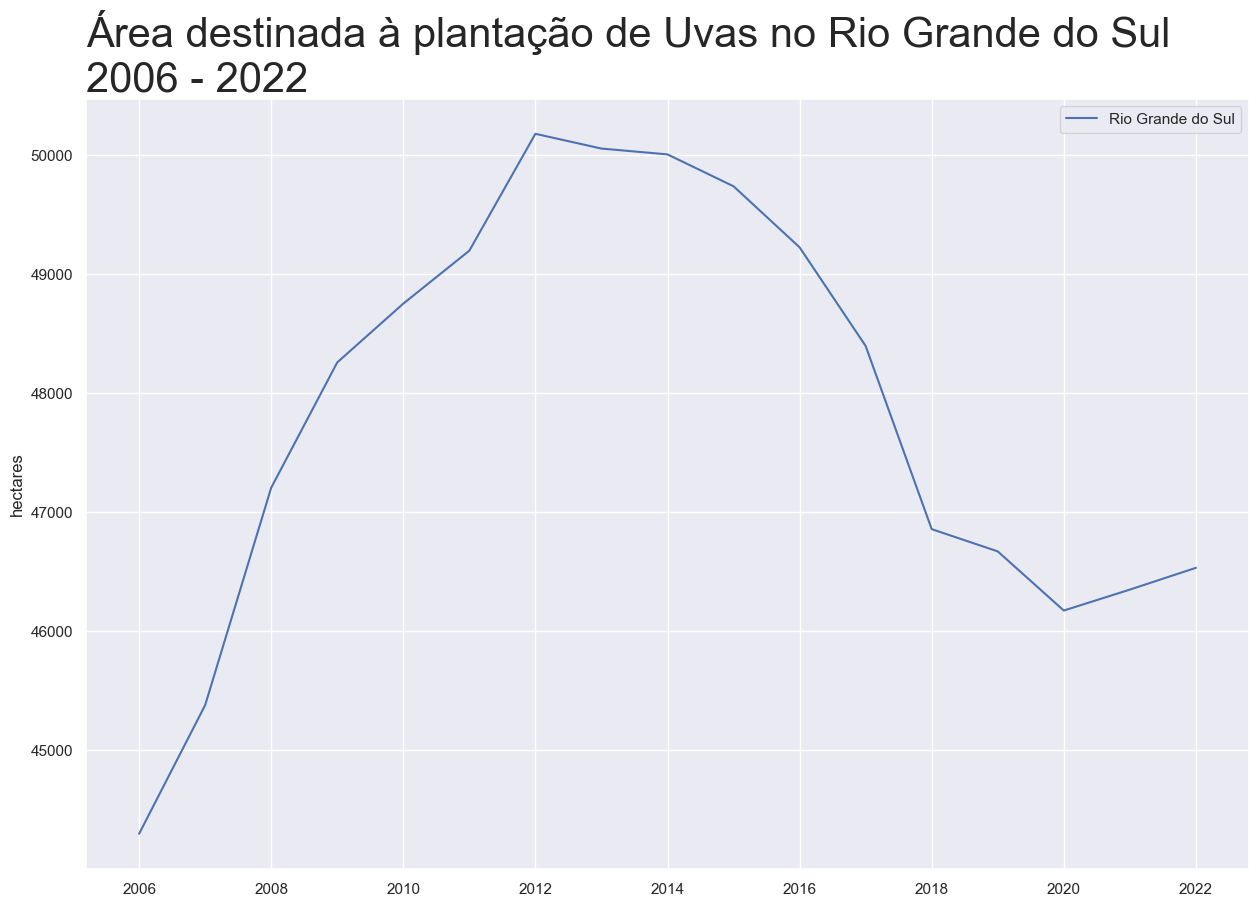

In [35]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.lineplot(area_destinada_RS)
ax.set_title('Área destinada à plantação de Uvas no Rio Grande do Sul \n2006 - 2022', loc='left', fontsize=30)
ax.set_ylabel('hectares')
ax.legend()


plt.show()

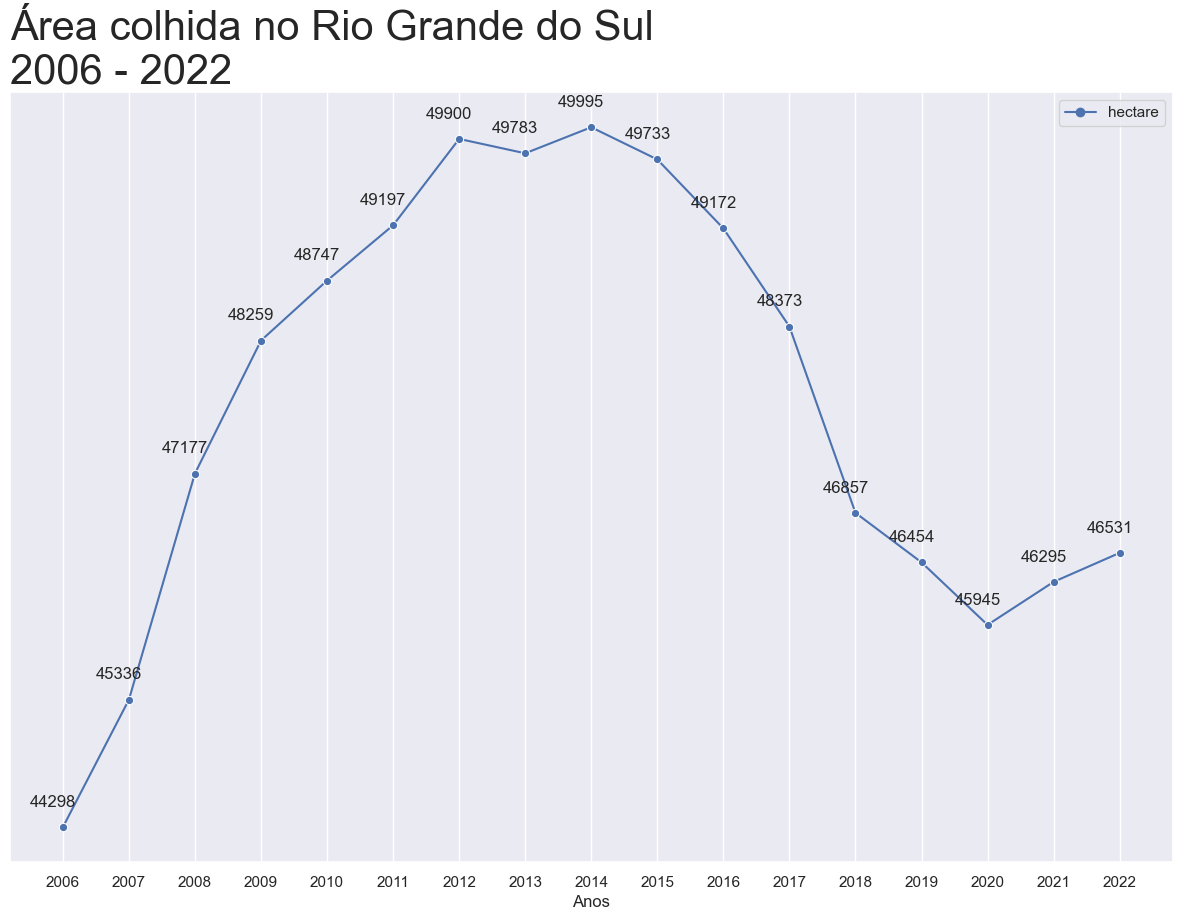

In [36]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.lineplot(area_colhida_filtrada3, markers='o')
ax.set_title('Área colhida no Rio Grande do Sul \n2006 - 2022', loc='left', fontsize=30)
ax.set_ylabel('Hectares')

for i, v in enumerate(area_colhida_filtrada3['hectare']):
#     ax.text(v + 20, i, str(v), color='black', fontsize=12, ha='left', va='center')
#     print(v)
    ax.text(i-0.5, v+165.2, v)

ax.get_yaxis().set_visible(False)
    
    
plt.show()

In [37]:
oiv_df = pd.read_csv("oiv_brazil.csv",sep=';')
oiv_df.head(20)

,Continent,Region/Country,Product,Variable,Year,Unit,Quantity
0,America,Brazil,Fresh Grapes,Production,2021,tonnes,1 687 908
1,America,Brazil,Fresh Grapes,Production,2017,tonnes,1 680 020
2,America,Brazil,Fresh Grapes,Production,2018,tonnes,1 592 242
3,America,Brazil,Fresh Grapes,Production,2022,tonnes,1 502 357
4,America,Brazil,Fresh Grapes,Production,2015,tonnes,1 499 353
5,America,Brazil,Fresh Grapes,Production,2011,tonnes,1 463 481
6,America,Brazil,Fresh Grapes,Production,2012,tonnes,1 455 809
7,America,Brazil,Fresh Grapes,Production,2019,tonnes,1 445 705
8,America,Brazil,Fresh Grapes,Production,2014,tonnes,1 436 074
9,America,Brazil,Fresh Grapes,Production,2008,tonnes,1 421 431


In [43]:
oiv_production = oiv_df[oiv_df['Variable'] == 'Production']
oiv_production

,Continent,Region/Country,Product,Variable,Year,Unit,Quantity
0,America,Brazil,Fresh Grapes,Production,2021,tonnes,1 687 908
1,America,Brazil,Fresh Grapes,Production,2017,tonnes,1 680 020
2,America,Brazil,Fresh Grapes,Production,2018,tonnes,1 592 242
3,America,Brazil,Fresh Grapes,Production,2022,tonnes,1 502 357
4,America,Brazil,Fresh Grapes,Production,2015,tonnes,1 499 353
...,...,...,...,...,...,...,...
276,America,Brazil,Wine,Production,1996,100000l,2 320
277,America,Brazil,Wine,Production,2020,100000l,2 257
278,America,Brazil,Wine,Production,2023,100000l,2 250
279,America,Brazil,Wine,Production,2019,100000l,2 176


In [44]:
oiv_exportation = oiv_df[oiv_df['Year'] > 2005]
oiv_exportation

,Continent,Region/Country,Product,Variable,Year,Unit,Quantity
0,America,Brazil,Fresh Grapes,Production,2021,tonnes,1 687 908
1,America,Brazil,Fresh Grapes,Production,2017,tonnes,1 680 020
2,America,Brazil,Fresh Grapes,Production,2018,tonnes,1 592 242
3,America,Brazil,Fresh Grapes,Production,2022,tonnes,1 502 357
4,America,Brazil,Fresh Grapes,Production,2015,tonnes,1 499 353
...,...,...,...,...,...,...,...
352,America,Brazil,Dried Grapes,Exports,2011,tonnes,2
353,America,Brazil,Dried Grapes,Exports,2012,tonnes,2
354,America,Brazil,Dried Grapes,Exports,2018,tonnes,2
355,America,Brazil,Dried Grapes,Exports,2007,tonnes,1


In [45]:
oiv_exportation = oiv_exportation[oiv_exportation['Variable'] == 'Exports']
oiv_exportation

,Continent,Region/Country,Product,Variable,Year,Unit,Quantity
96,America,Brazil,Fresh Grapes,Exports,2008,tonnes,82 242
102,America,Brazil,Fresh Grapes,Exports,2007,tonnes,79 081
104,America,Brazil,Fresh Grapes,Exports,2021,tonnes,76 609
110,America,Brazil,Fresh Grapes,Exports,2006,tonnes,62 251
113,America,Brazil,Fresh Grapes,Exports,2010,tonnes,60 799
115,America,Brazil,Fresh Grapes,Exports,2011,tonnes,59 391
118,America,Brazil,Fresh Grapes,Exports,2009,tonnes,54 560
119,America,Brazil,Fresh Grapes,Exports,2022,tonnes,52 561
120,America,Brazil,Fresh Grapes,Exports,2012,tonnes,52 016
122,America,Brazil,Fresh Grapes,Exports,2020,tonnes,49 228


In [46]:
oiv_exportation.shape

(47, 7)

In [47]:
oiv_exportation = oiv_exportation[['Region/Country', 'Product', 'Year', 'Unit', 'Quantity']]
oiv_exportation

,Region/Country,Product,Year,Unit,Quantity
96,Brazil,Fresh Grapes,2008,tonnes,82 242
102,Brazil,Fresh Grapes,2007,tonnes,79 081
104,Brazil,Fresh Grapes,2021,tonnes,76 609
110,Brazil,Fresh Grapes,2006,tonnes,62 251
113,Brazil,Fresh Grapes,2010,tonnes,60 799
115,Brazil,Fresh Grapes,2011,tonnes,59 391
118,Brazil,Fresh Grapes,2009,tonnes,54 560
119,Brazil,Fresh Grapes,2022,tonnes,52 561
120,Brazil,Fresh Grapes,2012,tonnes,52 016
122,Brazil,Fresh Grapes,2020,tonnes,49 228


In [48]:
set(oiv_exportation['Product'])

{'Dried Grapes', 'Fresh Grapes', 'Wine'}

In [49]:
oiv_expoortation_wine = oiv_exportation[oiv_exportation['Product'] == 'Wine']
oiv_expoortation_wine

,Region/Country,Product,Year,Unit,Quantity
306,Brazil,Wine,2009,100000l,257
315,Brazil,Wine,2008,100000l,96
316,Brazil,Wine,2013,100000l,91
317,Brazil,Wine,2021,100000l,80
319,Brazil,Wine,2022,100000l,78
323,Brazil,Wine,2012,100000l,59
325,Brazil,Wine,2020,100000l,50
326,Brazil,Wine,2018,100000l,42
327,Brazil,Wine,2019,100000l,38
330,Brazil,Wine,2006,100000l,34


In [50]:
oiv_expoortation_wine = oiv_expoortation_wine[['Year', 'Quantity']]
oiv_expoortation_wine.set_index('Year', inplace=True)
oiv_expoortation_wine

,Quantity
Year,
2009,257
2008,96
2013,91
2021,80
2022,78
2012,59
2020,50
2018,42
2019,38


In [51]:
oiv_expoortation_wine2 = oiv_expoortation_wine
oiv_expoortation_wine2

,Quantity
Year,
2009,257
2008,96
2013,91
2021,80
2022,78
2012,59
2020,50
2018,42
2019,38


In [52]:
oiv_expoortation_wine = oiv_expoortation_wine.sort_index()
oiv_expoortation_wine

,Quantity
Year,
2006,34
2007,27
2008,96
2009,257
2010,15
2011,13
2012,59
2013,91
2014,27


In [53]:
oiv_expoortation_wine2 = oiv_expoortation_wine
oiv_expoortation_wine2.reset_index(inplace=True)
oiv_expoortation_wine2

,Year,Quantity
0,2006,34
1,2007,27
2,2008,96
3,2009,257
4,2010,15
5,2011,13
6,2012,59
7,2013,91
8,2014,27
9,2015,13


In [54]:
oiv_expoortation_wine2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      17 non-null     int64 
 1   Quantity  17 non-null     object
dtypes: int64(1), object(1)
memory usage: 404.0+ bytes


In [55]:
oiv_expoortation_wine2 = oiv_expoortation_wine2.astype(object).astype(int)

In [56]:
oiv_expoortation_wine2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Year      17 non-null     int32
 1   Quantity  17 non-null     int32
dtypes: int32(2)
memory usage: 268.0 bytes


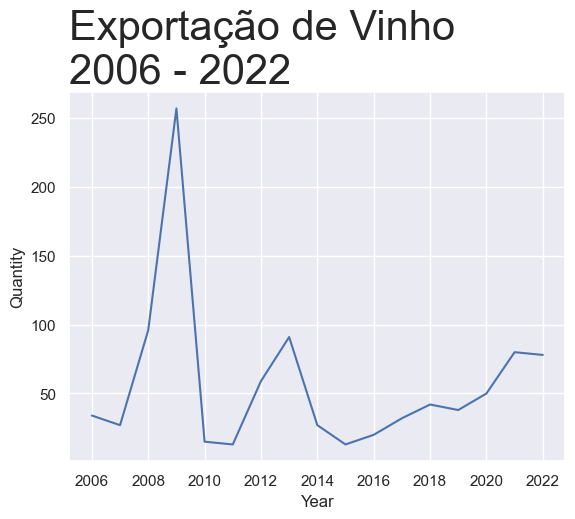

In [60]:
fig, ax = plt.subplots()
ax = sns.lineplot(
    data = oiv_expoortation_wine2, 
    x=oiv_expoortation_wine2['Year'], 
    y=oiv_expoortation_wine2['Quantity'], 
    markers='o'
)
ax.set_title('Exportação de Vinho \n2006 - 2022', loc='left', fontsize=30)
# for x, y in enumerate(oiv_expoortation_wine2['Quantity']):
#     ax.text(x-0.5, y+165.2, y)
# for i, v in enumerate(oiv_expoortation_wine2['Quantity']):
#     ax.text(i-0.5, v+165.2, v)

# ax.get_yaxis().set_visible(False)

plt.show()

In [61]:
dft = oiv_expoortation_wine2.set_index('Year')

In [62]:
dft = dft.T

In [63]:
dft

Year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Quantity,34,27,96,257,15,13,59,91,27,13,20,32,42,38,50,80,78


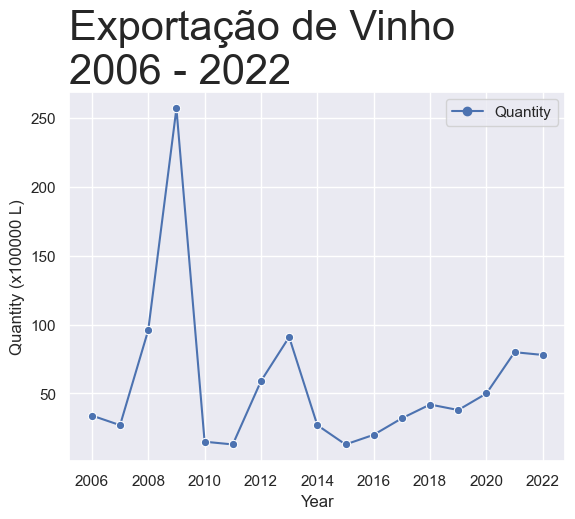

In [71]:
fig, ax = plt.subplots()
ax=sns.lineplot(dft.T, markers='o')
ax.set_title('Exportação de Vinho \n2006 - 2022', loc='left', fontsize=30)
ax.set_ylabel('Quantity (x100000 L)')
# for x, y in enumerate(oiv_expoortation_wine2['Quantity']):
#     ax.text(x-0.5, y+165.2, y)
# for i, v in enumerate(oiv_expoortation_wine2['Quantity']):
#     ax.text(i-0.5, v+165.2, v)

# ax.get_yaxis().set_visible(False)

plt.show()

In [74]:
oiv_production = oiv_production[oiv_production['Year'] > 2005]
oiv_production = oiv_production[oiv_production['Product'] == 'Wine']
oiv_production

,Continent,Region/Country,Product,Variable,Year,Unit,Quantity
229,America,Brazil,Wine,Production,2008,100000l,3 683
234,America,Brazil,Wine,Production,2017,100000l,3 553
236,America,Brazil,Wine,Production,2007,100000l,3 502
239,America,Brazil,Wine,Production,2011,100000l,3 460
247,America,Brazil,Wine,Production,2022,100000l,3 200
256,America,Brazil,Wine,Production,2018,100000l,3 084
260,America,Brazil,Wine,Production,2012,100000l,2 967
262,America,Brazil,Wine,Production,2021,100000l,2 928
263,America,Brazil,Wine,Production,2014,100000l,2 810
266,America,Brazil,Wine,Production,2009,100000l,2 720


In [76]:
oiv_production = oiv_production.sort_values('Year')
oiv_production = oiv_production[['Year', 'Quantity']]
oiv_production

,Year,Quantity
274,2006,2 372
236,2007,3 502
229,2008,3 683
266,2009,2 720
272,2010,2 459
239,2011,3 460
260,2012,2 967
267,2013,2 710
263,2014,2 810
268,2015,2 699


In [77]:
dft2 = oiv_production.set_index('Year')

In [81]:
dft2['Quantity'].astype(object).astype(int)

ValueError: invalid literal for int() with base 10: ' 2 372'

TypeError: 'NoneType' object is not iterable

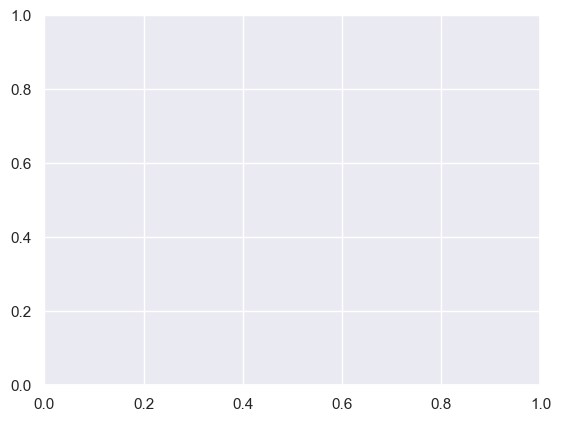

In [80]:
sns.lineplot(dft2)